# MVA - DL - MP1 - SEVESTRE JEAN-BAPTISTE

# Project: Image Classification and Regression

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.patches as patches
import keras.utils as np_utils

import keras.utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras import optimizers

from keras.layers import UpSampling2D
from keras.layers import Input
from keras.models import Model

Using TensorFlow backend.


## 3. Simple Classification

In [2]:
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    #print('Creating data:')
    for i in range(nb_samples):
        #if i % 10 == 0:
            #print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    print('done')
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    #print('Creating data:')
    for i in range(nb_samples):
        #if i % 10 == 0:
        #    print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    print('done')
    return [X, Y]

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()
    
def visualization(n,x,y,z):
    fig, ax = plt.subplots(1,5,figsize=(20, 20))
    fig.subplots_adjust(left=0.03, right=0.97, hspace=0.6, wspace=0.05)
    
    i = n
    for a in ax:
        I = x[i].reshape((IMAGE_SIZE,IMAGE_SIZE))
        a.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
        a.set_xlim([0,1])
        a.set_ylim([0,1])
        
        xy = y[i].reshape(3,2)
        tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'g', linewidth = 5, alpha = 0.5)
        a.add_patch(tri)
        
        xz = z[i].reshape(3,2)
        tri_2 = patches.Polygon(xz, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
        a.add_patch(tri_2)
        
        i = i + 1
    plt.show()
    
def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

In [3]:
IMAGE_SIZE = 72

In [4]:
#im = generate_a_rectangle(10, True)
#plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

#im = generate_a_disk(10)
#plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

#[im, v] = generate_a_triangle(20, False)
#plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

### Loading the data

In [5]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
[X_test, Y_test] = generate_dataset_classification(300,20)

done
done


### Visualizating one Sample

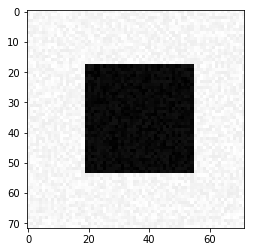

In [6]:
plt.imshow(X_train[10].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

### Reformating

In [7]:
X_train = X_train.reshape(X_train.shape[0],IMAGE_SIZE,IMAGE_SIZE,1)
Y_train = keras.utils.to_categorical(Y_train,num_classes=3)

X_test = X_test.reshape(X_test.shape[0],IMAGE_SIZE,IMAGE_SIZE,1)
Y_test = keras.utils.to_categorical(Y_test,num_classes=3)

### Creating the model

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
model.add(Dense(3, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


### SGD

#### Optimization

In [9]:
model_sgd = Sequential()
model_sgd.add(Flatten(input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
model_sgd.add(Dense(3, activation='softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_sgd.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_sgd.fit(X_train, Y_train, batch_size=32, epochs=40, verbose=0)

#### Testing

In [10]:
score = model_sgd.evaluate(X_test, Y_test, verbose=0)

print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 10.369308102925618
Test accuracy: 0.3566666662693024


### ADAM

#### Optimization

In [11]:
model_adam = Sequential()
model_adam.add(Flatten(input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
model_adam.add(Dense(3, activation='softmax'))

model_adam.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_adam.fit(X_train, Y_train, batch_size=32, epochs=40, verbose=0)

#### Testing

In [12]:
score = model_adam.evaluate(X_test, Y_test, verbose=0)

print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.03470267002781232
Test accuracy: 1.0


### Conclusion

Adam gives a better loss and a better accuracy than SGD.

## 4. Visualization of the Solution

### Reformating the weights

In [13]:
col_1 = model_adam.get_weights()[0][:,0].reshape((72,72))
col_2 = model_adam.get_weights()[0][:,1].reshape((72,72))
col_3 = model_adam.get_weights()[0][:,2].reshape((72,72))

### Visualization of the weights

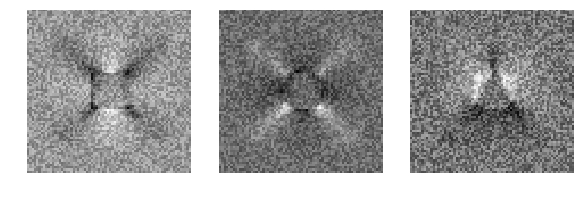

In [14]:
fig = plt.figure(figsize=(10,3))

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(col_1, cmap='gray')
ax1.axis('off')

ax1 = fig.add_subplot(1,3,2)
ax1.imshow(col_2, cmap='gray')
ax1.axis('off')

ax1 = fig.add_subplot(1,3,3)
ax1.imshow(col_3, cmap='gray')
ax1.axis('off')
    
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

## 5. A More Difficult Classification Problem

Now, the shapes are allowed to move within the images and change dimensions.

### Loading the data

In [15]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
[X_test, Y_test] = generate_test_set_classification()

done
done


### Visualizating one Sample

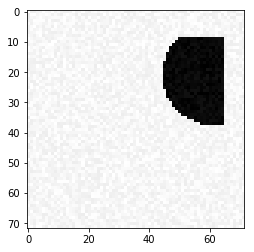

In [16]:
plt.imshow(X_train[1].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

### Reformating

In [17]:
X_train = X_train.reshape(X_train.shape[0],IMAGE_SIZE,IMAGE_SIZE,1)
Y_train = keras.utils.to_categorical(Y_train,num_classes=3)

X_test = X_test.reshape(X_test.shape[0],IMAGE_SIZE,IMAGE_SIZE,1)

### Model (Linear classifier)

In [18]:
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
model_linear.add(Dense(3, activation='softmax'))

#### Optimization

In [19]:
model_linear.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_linear.fit(X_train, Y_train, batch_size=32, epochs=40, verbose=0)

#### Testing

In [20]:
score = model_linear.evaluate(X_test,Y_test,verbose=0)

print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.9696217314402262
Test accuracy: 0.48333333353201546


### Model (Convolutional deep network)

In [21]:
model_cnn = Sequential()

model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(35,35,32)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(16,16,32)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Flatten())

model_cnn.add(Dense(1568, activation='relu'))

model_cnn.add(Dense(128, activation='relu'))

model_cnn.add(Dense(3, activation='softmax'))

model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 70, 70, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
__________

#### Optimization

In [22]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.fit(X_train, Y_train, batch_size=32, epochs=40, verbose=2)

Epoch 1/40
 - 2s - loss: 1.1862 - acc: 0.3367
Epoch 2/40
 - 1s - loss: 1.0843 - acc: 0.4267
Epoch 3/40
 - 1s - loss: 1.0599 - acc: 0.4733
Epoch 4/40
 - 1s - loss: 1.0255 - acc: 0.4167
Epoch 5/40
 - 1s - loss: 0.8763 - acc: 0.5667
Epoch 6/40
 - 1s - loss: 0.8226 - acc: 0.6267
Epoch 7/40
 - 1s - loss: 0.7494 - acc: 0.6900
Epoch 8/40
 - 1s - loss: 0.7393 - acc: 0.6567
Epoch 9/40
 - 1s - loss: 0.6323 - acc: 0.7233
Epoch 10/40
 - 2s - loss: 0.4994 - acc: 0.7900
Epoch 11/40
 - 1s - loss: 0.3703 - acc: 0.8667
Epoch 12/40
 - 1s - loss: 0.2575 - acc: 0.9000
Epoch 13/40
 - 1s - loss: 0.2227 - acc: 0.9167
Epoch 14/40
 - 1s - loss: 0.1818 - acc: 0.9467
Epoch 15/40
 - 1s - loss: 0.1168 - acc: 0.9733
Epoch 16/40
 - 1s - loss: 0.1194 - acc: 0.9633
Epoch 17/40
 - 1s - loss: 0.0540 - acc: 0.9867
Epoch 18/40
 - 1s - loss: 0.0488 - acc: 0.9800
Epoch 19/40
 - 1s - loss: 0.0309 - acc: 0.9933
Epoch 20/40
 - 1s - loss: 0.0721 - acc: 0.9700
Epoch 21/40
 - 1s - loss: 0.0845 - acc: 0.9800
Epoch 22/40
 - 1s - lo

#### Testing

In [23]:
score = model_cnn.evaluate(X_test, Y_test, verbose=0)

print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.2417559492588043
Test accuracy: 0.943333334128062


### Conclusion

The value of the loss function on this test set when using the deep network is 0.24. It is an improvement (with the linear classifier we had a loss of 0.97 for the same number of epochs).
Furthermore, the convolutional deep network gives a better accuracy than the linear classifier.

## 6. A Regression Problem

The task now is to predict the image locations of the vertices of a triangle, given an image of this triangle

### Generate a training and test set

In [24]:
[X_train, Y_train] = generate_dataset_regression(300, 20)
[X_test, Y_test] = generate_test_set_regression()

done
done


### Order vertices

First we make a function to order the vertices in the x-axis order.

In [25]:
def ordered(tab_1):
    tab = np.copy(tab_1)
    for i in range(0,300):
        a = np.copy(tab[i][0])
        b = np.copy(tab[i][1])
        c = np.copy(tab[i][2])
        if(a[0] <= b[0] <= c[0]):
            tab[i][0] = a
            tab[i][1] = b
            tab[i][2] = c
        elif(a[0] <= c[0] <= b[0]):
            tab[i][0] = a
            tab[i][1] = c
            tab[i][2] = b
        elif(b[0] <= a[0] <= c[0]):
            tab[i][0] = b
            tab[i][1] = a
            tab[i][2] = c
        elif(b[0] <= c[0] <= a[0]):
            tab[i][0] = b
            tab[i][1] = c
            tab[i][2] = a
        elif(c[0] <= a[0] <= b[0]):
            tab[i][0] = c
            tab[i][1] = a
            tab[i][2] = b
        elif(c[0] <= b[0] <= a[0]):
            tab[i][0] = c
            tab[i][1] = b
            tab[i][2] = a
    return tab

In [26]:
Y_vertices_train = ordered(Y_train.reshape(300,3,2)).reshape(300,6)
Y_vertices_test = ordered(Y_test.reshape(300,3,2)).reshape(300,6)

### Normalized $Y$

We've normalized $Y_{train}$ and $Y_{test}$ :

In [27]:
from sklearn import preprocessing

std_train = np.std(Y_vertices_train, 1)
mean_train = np.mean(Y_vertices_train, 1)
std_test = np.std(Y_vertices_test, 1)
mean_test = np.mean(Y_vertices_test, 1)

Y_vertices_train = preprocessing.scale(Y_vertices_train, axis=1)
Y_vertices_test = preprocessing.scale(Y_vertices_test, axis=1)

In [28]:
def denormalize_train(tab_1):
    tab = np.copy(tab_1)
    for i in range(0,300):
        tab[i] = np.copy(tab_1[i])*std_train[i]+mean_train[i]
    return tab

def denormalize_test(tab_1):
    tab = np.copy(tab_1)
    for i in range(0,300):
        tab[i] = np.copy(tab_1[i])*std_test[i]+mean_test[i]
    return tab

### Visualize a training sample

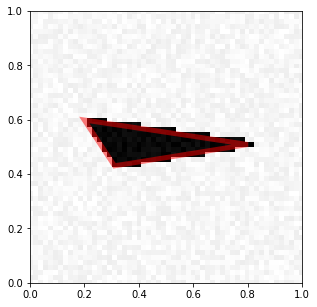

In [29]:
n = 12
visualize_prediction(X_train[n], denormalize_train(Y_vertices_train)[n])

### Reformating

In [30]:
X_train = X_train.reshape(X_train.shape[0],IMAGE_SIZE,IMAGE_SIZE,1)
X_test = X_test.reshape(X_test.shape[0],IMAGE_SIZE,IMAGE_SIZE,1)

### Model

In [31]:
model_vertices = Sequential()

model_vertices.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
model_vertices.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_vertices.add(Dropout(0.25))

model_vertices.add(Conv2D(32, (3, 3), activation='relu', input_shape=(35,35,32)))
model_vertices.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_vertices.add(Dropout(0.25))

model_vertices.add(Conv2D(32, (3, 3), activation='relu', input_shape=(16,16,32)))
model_vertices.add(MaxPooling2D(pool_size=(2, 2)))
model_vertices.add(Dropout(0.25))

model_vertices.add(Flatten())

model_vertices.add(Dense(1568, activation='relu'))

model_vertices.add(Dense(128, activation='relu'))

model_vertices.add(Dense(6))

### Optimization

In [32]:
model_vertices.compile(loss='mean_squared_error', optimizer='adam')
model_vertices.fit(X_train, Y_vertices_train, batch_size=8, epochs=80, verbose=2)

Epoch 1/80
 - 2s - loss: 0.7497
Epoch 2/80
 - 2s - loss: 0.5548
Epoch 3/80
 - 2s - loss: 0.4256
Epoch 4/80
 - 2s - loss: 0.3624
Epoch 5/80
 - 2s - loss: 0.3077
Epoch 6/80
 - 2s - loss: 0.2655
Epoch 7/80
 - 2s - loss: 0.2128
Epoch 8/80
 - 2s - loss: 0.1748
Epoch 9/80
 - 2s - loss: 0.1338
Epoch 10/80
 - 2s - loss: 0.1199
Epoch 11/80
 - 2s - loss: 0.0977
Epoch 12/80
 - 2s - loss: 0.0831
Epoch 13/80
 - 2s - loss: 0.0778
Epoch 14/80
 - 2s - loss: 0.0612
Epoch 15/80
 - 2s - loss: 0.0537
Epoch 16/80
 - 2s - loss: 0.0532
Epoch 17/80
 - 2s - loss: 0.0428
Epoch 18/80
 - 2s - loss: 0.0419
Epoch 19/80
 - 2s - loss: 0.0362
Epoch 20/80
 - 2s - loss: 0.0374
Epoch 21/80
 - 2s - loss: 0.0363
Epoch 22/80
 - 2s - loss: 0.0365
Epoch 23/80
 - 2s - loss: 0.0387
Epoch 24/80
 - 2s - loss: 0.0331
Epoch 25/80
 - 2s - loss: 0.0278
Epoch 26/80
 - 2s - loss: 0.0261
Epoch 27/80
 - 2s - loss: 0.0256
Epoch 28/80
 - 2s - loss: 0.0249
Epoch 29/80
 - 2s - loss: 0.0272
Epoch 30/80
 - 2s - loss: 0.0291
Epoch 31/80
 - 2s -

### Evaluate the solution

In [33]:
score = model_vertices.evaluate(X_test, Y_vertices_test, verbose=0)
print('Test loss:',score)

Test loss: 0.20252137263615927


### Visualize the prediction

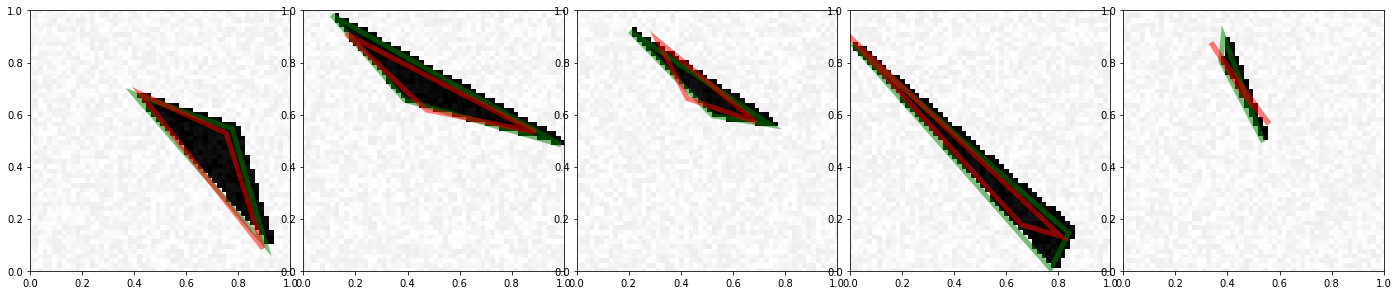

In [54]:
n = 5
Y_vertices_predict = model_vertices.predict(X_test)
visualization(n,X_test, denormalize_test(Y_vertices_test), denormalize_test(Y_vertices_predict))

### Conclusion

We have normalized and ordered the vertices in the x-axis order : we note that improve our results significantly.

## 7. Image Denoising

Implement a hourglass network for denoising

In [35]:
def generate_a_noisy_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    ### modified
    imdata_noisy = imdata + noise * np.random.random(imdata.size)
    imdata = imdata
    ###
    plt.close(fig)
    return imdata_noisy, imdata

def generate_a_noisy_rectangle(noise=0.0):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    
    side = (0.3 + 0.7 * np.random.random()) * figsize
    top = figsize/2 + side/2
    bottom = figsize/2 - side/2
    left = bottom
    right = top
    
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_noisy_drawing(figsize, U, V, noise)


def generate_a_noisy_disk(noise=0.0):
    figsize = 1.0
    
    center = (figsize/2, figsize/2)
    
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_noisy_drawing(figsize, U, V, noise)

def generate_a_noisy_triangle(noise=0.0):
    figsize = 1.0
    
    size = (0.3 + 0.7 * np.random.random())*figsize/2
    middle = figsize/2
    U = (middle, middle+size, middle-size)
    V = (middle+size, middle-size, middle-size)
    
    return generate_a_noisy_drawing(figsize, U, V, noise)
    
def generate_dataset_denoising(nb_samples, max_noise = 500):
    
    im_size = generate_a_rectangle().shape[0]
    
    X_noisy = np.zeros([nb_samples,im_size])
    X = np.zeros([nb_samples,im_size])
    
    for i in range(nb_samples):
        
        noise = np.random.randint(max_noise)
        category = np.random.randint(3)
        
        if category == 0:
            X_noisy[i], X[i] = generate_a_noisy_rectangle(noise)
        elif category == 1: 
            X_noisy[i], X[i] = generate_a_noisy_disk(noise)
        else:
            X_noisy[i], X[i] = generate_a_noisy_triangle(noise)
        
        X_noisy[i] = (X_noisy[i] + noise) / (255 + 2 * noise)
        X[i] = X[i] / 255
   
    return [X_noisy, X]


### Generate a training and test set

In [36]:
[X_noisy_train, X_train_7] = generate_dataset_denoising(300)
[X_noisy_test, _] = generate_dataset_denoising(300, 100)

### Visualize a training sample

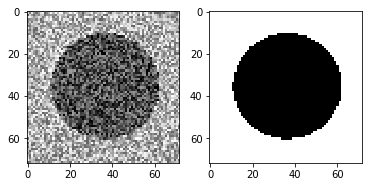

In [37]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(X_noisy_train[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(X_train_7[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

### Reformating

In [38]:
X_train_7 = X_train_7.reshape(X_train_7.shape[0],IMAGE_SIZE,IMAGE_SIZE,1)
X_noisy_train = X_noisy_train.reshape(X_noisy_train.shape[0],IMAGE_SIZE,IMAGE_SIZE,1)

X_noisy_test = X_noisy_test.reshape(X_noisy_test.shape[0],IMAGE_SIZE,IMAGE_SIZE,1)

### Model

In [39]:
input_img = Input(shape=(IMAGE_SIZE,IMAGE_SIZE, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 72, 72, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 18, 18, 32)        9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 36, 36, 32)        0         
__________

### Optimization

In [40]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adadelta')
autoencoder.fit(X_noisy_train, X_train_7, batch_size=4, epochs=40, verbose=2)

Epoch 1/40
 - 3s - loss: 0.4305
Epoch 2/40
 - 3s - loss: 0.2372
Epoch 3/40
 - 3s - loss: 0.0613
Epoch 4/40
 - 3s - loss: 0.0256
Epoch 5/40
 - 3s - loss: 0.0269
Epoch 6/40
 - 3s - loss: 0.0256
Epoch 7/40
 - 3s - loss: 0.0217
Epoch 8/40
 - 4s - loss: 0.0225
Epoch 9/40
 - 4s - loss: 0.0218
Epoch 10/40
 - 3s - loss: 0.0189
Epoch 11/40
 - 3s - loss: 0.0157
Epoch 12/40
 - 3s - loss: 0.0171
Epoch 13/40
 - 3s - loss: 0.0152
Epoch 14/40
 - 3s - loss: 0.0149
Epoch 15/40
 - 3s - loss: 0.0135
Epoch 16/40
 - 3s - loss: 0.0125
Epoch 17/40
 - 3s - loss: 0.0120
Epoch 18/40
 - 3s - loss: 0.0126
Epoch 19/40
 - 3s - loss: 0.0101
Epoch 20/40
 - 3s - loss: 0.0104
Epoch 21/40
 - 3s - loss: 0.0098
Epoch 22/40
 - 3s - loss: 0.0098
Epoch 23/40
 - 3s - loss: 0.0085
Epoch 24/40
 - 3s - loss: 0.0095
Epoch 25/40
 - 3s - loss: 0.0096
Epoch 26/40
 - 3s - loss: 0.0066
Epoch 27/40
 - 4s - loss: 0.0082
Epoch 28/40
 - 4s - loss: 0.0077
Epoch 29/40
 - 4s - loss: 0.0077
Epoch 30/40
 - 3s - loss: 0.0068
Epoch 31/40
 - 3s -

### Visualization

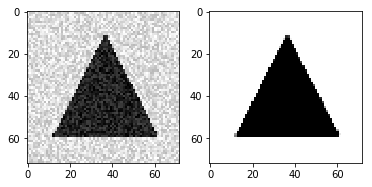

In [57]:
X_denoise = autoencoder.predict(X_noisy_test)

n = 3
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(X_noisy_test[n].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(X_denoise[n].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()